# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import sem
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [2]:
# Your code here:
employees = pd.read_csv('../data/employee.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
employees.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
# Your code here:
countHourly = (employees['Salary or Hourly'] == 'Hourly').sum()
countSalary = (employees['Salary or Hourly'] == 'Salary').sum()
print(f"There are {countHourly} and {countSalary} employess hired as 'Hourly' and 'Salary' respectively")

There are 8022 and 25161 employess hired as 'Hourly' and 'Salary' respectively


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
# Your code here:
employees[['Department','Job Titles']].groupby('Department').count()

,Job Titles
Department,
ADMIN HEARNG,39
ANIMAL CONTRL,81
AVIATION,1629
BOARD OF ELECTION,107
BOARD OF ETHICS,8
BUDGET & MGMT,46
BUILDINGS,269
BUSINESS AFFAIRS,171
CITY CLERK,84


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In theory, we could conduct a Z test given the big amount of samples. However, to understand the process I will first conduct a confidence interval for the mean (with a t-function) and the corresponding t-test.

In [7]:
# Your code here:
# Build confidence intervals around the mean with t function.
idx = employees['Salary or Hourly'] == 'Hourly'
hourly_salaries = employees['Hourly Rate'][idx]
sample_n = len(hourly_salaries)
# degrees of freedom (dof)
dof = sample_n - 1
# calculate mean and std FROM the sample
mean_sal = hourly_salaries.mean()
# Endpoints of the range that contains 'alpha' percent of the distribution
alpha = 0.95
# Recall standard error mean SEM is equal to std/sqrt(sample_n)
conf_interval = t.interval(alpha, dof, loc=mean_sal, scale=sem(hourly_salaries))
i_0 = round(conf_interval[0],2)
i_1 = round(conf_interval[1],2)
print(f"Confidence interval of 95% confidence for average hourly salary is [{i_0},{i_1}]")

Confidence interval of 95% confidence for average hourly salary is [32.52,33.05]


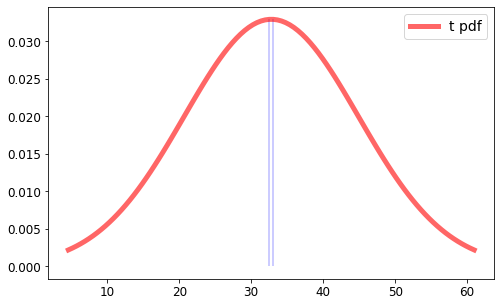

In [8]:
# print the stuff
std_sal  = hourly_salaries.std()
x = np.linspace(t.ppf(0.01,dof,loc=mean_sal,scale=std_sal),t.ppf(0.99,dof,loc=mean_sal,scale=std_sal), 100)
array = t.pdf(x,dof,loc=mean_sal,scale=std_sal)
plt.figure(figsize=[8,5])
plt.plot(x, array,'r-', lw=5, alpha=0.6, label='t pdf')
plt.vlines(conf_interval, 0, t.pdf(conf_interval,dof,loc=mean_sal,scale=std_sal), colors='b', lw=2, alpha=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

In [9]:
# test using stats function (compared against the t value of +- 1.96 from table)
t_stat = (mean_sal - 30)/(std_sal/np.sqrt(sample_n))
print(f"Value for T statistic: {round(t_stat,2)}")

# I could also compute the t value from stat!
# use alpha as significance instead
alpha = 1 - alpha
t_bound = t.ppf(1 - alpha/2, dof)
print(f"T values are [{-t_bound},{t_bound}]")
# I would compare this against my t_stat value

ttest_1samp(hourly_salaries,30)

# I could also take the t values using interval function
# change alpha again, careful!
# alpha = 1 - alpha
# t.interval(alpha, dof)


Value for T statistic: 20.62
T values are [-1.9602597859561675,1.9602597859561675]


Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

We could conclude that the null hypothesis: $H_0\;\rightarrow\,$ $\mu_0=30$ is rejected with 95% confidence. Thus, there is statistical significance to confirm the alternative hypothesis $H_1\;\rightarrow\,$ $\mu\neq30$.

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. (The following statement is missleading!!!) --> If our hypothesis is greater than, then to reject, the test statistic must also be positive. (It should say that if the **alternative** hypothesis is greater than, then to **reject the null** hypothesis, the test statistic must be positive **AND** greater than the significant threshold given by the probability density function for t.

In [10]:
# Your code here:
idx = employees.Department == 'POLICE'
police_salaries = employees['Annual Salary'][idx]
print(f"Total number of POLICE employees: {len(police_salaries)}")
# remove NaN from salaries
police_salaries = police_salaries[police_salaries.notnull()]
sample_n = len(police_salaries)
print(f"Sample size of POLICE employees data with salary: {sample_n}")

mean_pol_sal = police_salaries.mean()
print(f"Sample mean salary from police {round(mean_pol_sal,2)}")
std_pol_sal  = police_salaries.std()
mu_0 = 86000

# Alternative one, compute t statistics:
t_stat = (mean_pol_sal - mu_0)/(std_pol_sal/np.sqrt(sample_n))
print(f"Value for T statistic: {round(t_stat,2)}")

# Now compute the test pvalue (one tail in percentage)!
print(f"P-value one-right-tail is: {round(ttest_1samp(police_salaries,86000)[1]/2*100,4)}%")

Total number of POLICE employees: 13414
Sample size of POLICE employees data with salary: 13404
Sample mean salary from police 86486.41
Value for T statistic: 3.08
P-value one-right-tail is: 0.103%


We could conclude from above that being T statistic > 0 and p-value < 5% then we could reject the null hypothesis $H_0\;\rightarrow\,$ $\mu_0\leq 86000$

(86177.05631531784, 86795.77269094894)


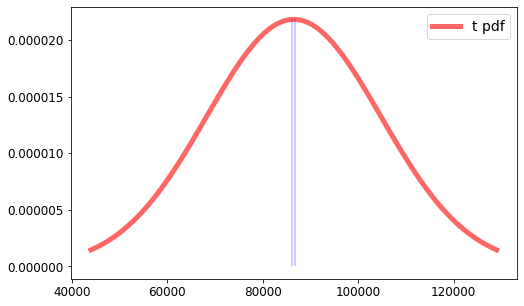

In [11]:
# what would make sense is to plot the mean salary confidence interval of 95%
# print the stuff
dof = sample_n - 1
x = np.linspace(t.ppf(0.01,dof,loc=mean_pol_sal,scale=std_pol_sal),t.ppf(0.99,dof,loc=mean_pol_sal,scale=std_pol_sal), 100)
array = t.pdf(x,dof,loc=mean_pol_sal,scale=std_pol_sal)
plt.figure(figsize=[8,5])
plt.plot(x, array,'r-', lw=5, alpha=0.6, label='t pdf')
alpha = 0.95
conf_interval = t.interval(alpha, dof, loc=mean_pol_sal, scale=sem(police_salaries))
plt.vlines(conf_interval, 0, t.pdf(conf_interval,dof,loc=mean_pol_sal,scale=std_pol_sal), colors='b', lw=2, alpha=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
print(conf_interval)

Using the `crosstab` function, find the department that has the most hourly workers. 

In [12]:
# Your code here:
pd.crosstab(employees['Department'], employees['Salary or Hourly']).sort_values('Hourly',ascending=False)


Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


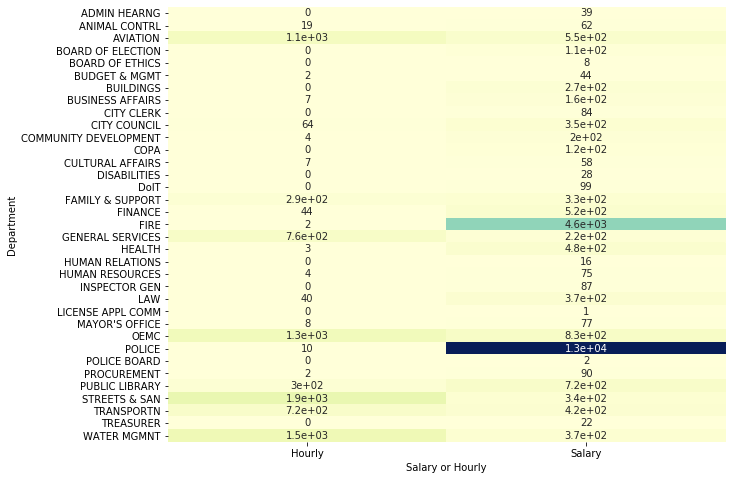

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(employees['Department'], employees['Salary or Hourly']),cmap="YlGnBu", annot=True, cbar=False)

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [14]:
# Your code here:
idx = employees.Department == 'STREETS & SAN'
streets_salaries = employees['Hourly Rate'][idx]
print(f"Total number of Streets & San employees: {len(streets_salaries)}")
# remove NaN from hourly salaries (filter Full times)
streets_salaries = streets_salaries[streets_salaries.notnull()]
sample_n = len(streets_salaries)
print(f"Sample size of Streets & San employees with hourly rate: {sample_n}")

mu_0 = 35
# Compute the t test hypothesis (left one tail)!
t_test_hourly = ttest_1samp(streets_salaries,mu_0)
print(f"P-value one-left-tail is: {round(t_test_hourly[1]/2*100,4)}%")
print(f"T statistics results: {round(t_test_hourly[0],2)}")

# Check left critical value for t probability distribution
t_bound = t.ppf(1 - alpha, dof)
print(f"Left critical value for t probability distribution is {round(t_bound,2)} for a {round((1-alpha)*100)}% significance.")



Total number of Streets & San employees: 2198
Sample size of Streets & San employees with hourly rate: 1862
P-value one-left-tail is: 0.0%
T statistics results: -9.57
Left critical value for t probability distribution is -1.64 for a 5% significance.


We could conclude from above that being T statistic < 0 and p-value < 5% then we could reject the null hypothesis $H_0\;\rightarrow\,$ $\mu_0\geq 35$. Thus, there is statistical significance to confirm the alternative hypothesis $H_1\;\rightarrow\,$ $\mu<35$.

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

Text(0.5, 1.0, '95% confidence interval - Mean hourly salary')

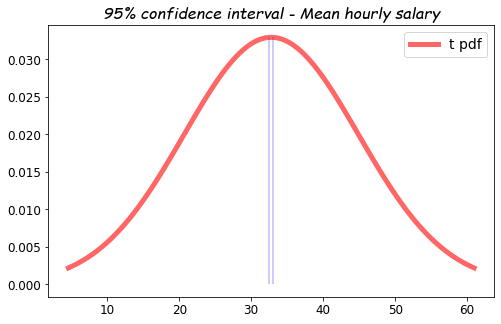

In [15]:
# Your code here:
# I am repeating this piece of code (already computed in challenge 2)

sample_n = len(hourly_salaries)
# degrees of freedom (dof)
dof = sample_n - 1
# Recall standard error mean SEM is equal to std/sqrt(sample_n)
conf_interval = t.interval(alpha, dof, loc=mean_sal, scale=sem(hourly_salaries))

x = np.linspace(t.ppf(0.01,dof,loc=mean_sal,scale=std_sal),t.ppf(0.99,dof,loc=mean_sal,scale=std_sal), 100)
array = t.pdf(x,dof,loc=mean_sal,scale=std_sal)
plt.figure(figsize=[8,5])
plt.plot(x, array,'r-', lw=5, alpha=0.6, label='t pdf')
plt.vlines(conf_interval, 0, t.pdf(conf_interval,dof,loc=mean_sal,scale=std_sal), colors='b', lw=2, alpha=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
title_prop = {'size':16,'family':'fantasy','style':'oblique'}
plt.title('95% confidence interval - Mean hourly salary', fontdict=title_prop)


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

Text(0.5, 1.0, '95% confidence interval - Police mean salary')

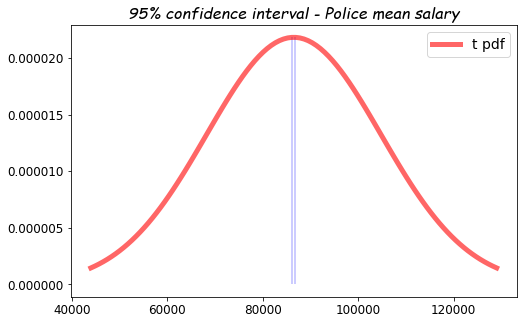

In [16]:
# Your code here:
# I am repeating this piece of code (already computed in challenge 2)

sample_n = len(police_salaries)
dof = sample_n - 1

x = np.linspace(t.ppf(0.01,dof,loc=mean_pol_sal,scale=std_pol_sal),t.ppf(0.99,dof,loc=mean_pol_sal,scale=std_pol_sal), 100)
array = t.pdf(x,dof,loc=mean_pol_sal,scale=std_pol_sal)
plt.figure(figsize=[8,5])
plt.plot(x, array,'r-', lw=5, alpha=0.6, label='t pdf')

conf_interval = t.interval(alpha, dof, loc=mean_pol_sal, scale=sem(police_salaries))
plt.vlines(conf_interval, 0, t.pdf(conf_interval,dof,loc=mean_pol_sal,scale=std_pol_sal), colors='b', lw=2, alpha=0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
title_prop = {'size':16,'family':'fantasy','style':'oblique'}
plt.title('95% confidence interval - Police mean salary', fontdict=title_prop)


# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [17]:
# Your code here:

